# BARAN AKYOL

K means for unsupervised clustering and Collaborative Filtering for object recommendation.

In [1842]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
import time
from operator import itemgetter

In [1843]:
x1 = np.random.normal(0,1,100)
y1 = np.random.normal(0,1,100)

x2 = np.random.normal(3,1,250)
y2 = np.random.normal(0,1,250)

x3 = np.random.normal(0,1,150)
y3 = np.random.normal(3,1,150)

x = np.concatenate((x1,x2,x3))
y = np.concatenate((y1,y2,y3))

data = np.vstack((x,y)).T

In [1844]:
# c Assignment Function

def assignment(data,mu):
    #data shape = (N,2)  mu shape = (K,2) 

    return np.argmin(distance.cdist(data,mu),axis=1)


In [1845]:
# mean Update Function

def update(data,c):
    
    mu = []
    for K in np.unique(c):
        index = np.where(c==K)
        mean = np.mean(data[index],axis=0)
        mu.append((mean[0],mean[1]))
        
    return np.array(mu)

In [1846]:
def K_means_objective(K,c,mu):
    
    
    error = 0
    for k in range(K):
        error += np.linalg.norm(data[np.where(c ==k)[0]]-mu[k])**2
        
    return error 

In [1847]:
# K-means algorithm

def K_means(data,K,iteration):
    
    mu = data[np.random.randint(500,size=K)]
    
    objectivefunction = []
    
    
    for i in range(iteration):
        
        c = assignment(data,mu)
        
        mu = update(data,c)
        
        objectivefunction.append(K_means_objective(K,c,mu))
        
    return c, objectivefunction
        

In [1848]:
c2,error2 = K_means(data,2,20)
c3,error3 = K_means(data,3,20)
c4,error4 = K_means(data,4,20)
c5,error5 = K_means(data,5,20)

# QUESTION 1 Part (a)

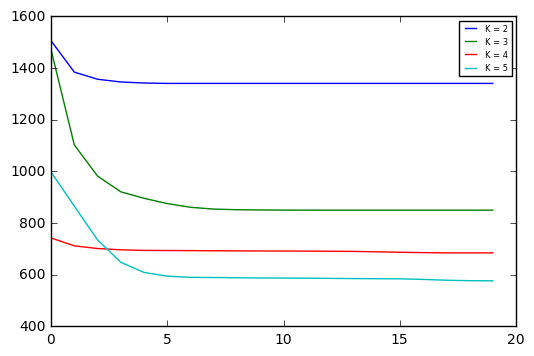

In [1860]:
plt.plot(error2,label = 'K = 2')
plt.plot(error3,label = 'K = 3')
plt.plot(error4,label = 'K = 4')
plt.plot(error5,label = 'K = 5')
plt.legend(loc=1,prop={'size':6})
plt.show()

# Question 1 Part (b)

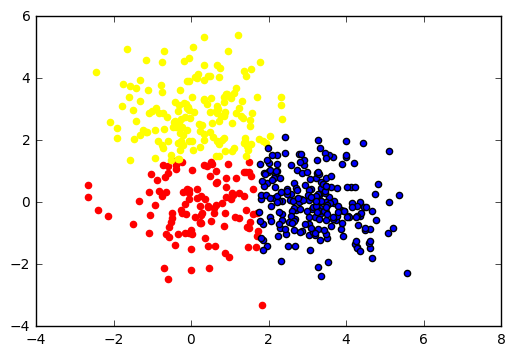

In [1861]:
plt.scatter(data[np.where(c3==0)][:,0],data[np.where(c3==0)][:,1],color='red')
plt.scatter(data[np.where(c3==1)][:,0],data[np.where(c3==1)][:,1],color='yellow')
plt.scatter(data[np.where(c3==2)][:,0],data[np.where(c3==2)][:,1])
plt.show()

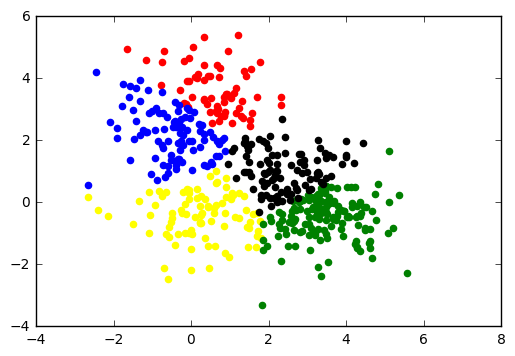

In [1851]:
plt.scatter(data[np.where(c5==0)][:,0],data[np.where(c5==0)][:,1],color='red')
plt.scatter(data[np.where(c5==1)][:,0],data[np.where(c5==1)][:,1],color='yellow')
plt.scatter(data[np.where(c5==2)][:,0],data[np.where(c5==2)][:,1],color='green')
plt.scatter(data[np.where(c5==3)][:,0],data[np.where(c5==3)][:,1],color='blue')
plt.scatter(data[np.where(c5==4)][:,0],data[np.where(c5==4)][:,1],color='black')
plt.show()

# PART 2 

In [1270]:
# import data
train = pd.read_csv("4721/ratings.csv",names = ['user_id','movie_id','rating'])
test = pd.read_csv('4721/ratings_test.csv',names =['user_id','movie_id','rating'] )

In [1271]:
def rating_Matrix(data):
    """ Constructs rating Matrix M and an Indicator Matrix
    
    Parameters
    ----------
    
    data: pandas DataFrame
    
    Returns
    -------
    
    M: numpy.ndarray
        rating Matrix
    
    """
    M = np.zeros([943,1682])

    for index, row in data.iterrows():
        M[int(row[0])-1,int(row[1])-1] = row[2] 
    

    
    return M

In [1272]:
def update_u_i2(vj,lamda,var,M):
        
    """ updates user locations
    
    Parameters
    ----------
    
    v: numpy.array
        object location vector (10,1682)
    
    var: int
        standard deviation squared
 
    lamda: int 
        regularization coefficient
        
    M: numpy.ndarray
        rating matrix
        
    Returns
    -------
    
    ui: numpy.array
        (943,10) matrix 
        
    """
     
    ui = np.zeros((943,10))
    
    indicator = M.copy()
    
    indicator[indicator!=0] = 1
    
    I = np.identity(10)
    
    for i in range(943):
    
        ui[i] = np.dot(np.linalg.inv(np.dot(indicator[i]*vj,vj.T) + lamda * var * I),np.sum(M[i] * vj,axis=1))
        
    return ui 

In [1273]:
def update_v_j2(ui,lamda,var,M):
    
    """ updates object locations
    
    Parameters
    ----------
    
    u: numpy.array
        user location vector (942,10)
    
    var: int
        standard deviation squared
 
    lamda: int 
        regularization coefficient
        
    M: numpy.ndarray
        rating matrix
        
    Returns
    -------
    
    vi: numpy.array
        (10,1682) matrix 
        
    """
        
    vj = np.zeros((1682,10))
    
    indicator = M.T.copy()
    
    indicator[indicator!=0] = 1
    
    I = np.identity(10)

    for j in range(1682):
    
        vj[j] = np.dot(np.linalg.inv(np.dot(indicator[j]*ui.T,ui) + lamda * var * I),np.sum(M.T[j] * ui.T,axis=1))
        
    return vj.T

In [1345]:
def MAP_objective(M,ui,vj,sigma,lamda):
    
    """Calculates the objective function's value for given iteration
    
    """
    first =  (np.linalg.norm(M - indicator * np.dot(ui,vj),axis=1)**2) / (-2*float(sigma))
    
    second = (float(lamda) /2) * np.linalg.norm(ui,axis=1)**2
    
    third = (float(lamda) /2) * np.linalg.norm(vj,axis=0)**2
    
    return  np.sum(first) - np.sum(second)  - np.sum(third)

In [1346]:
def RMSE(truth,prediction):
    
     """ Calculates Root Mean Squared Error
     
     """
    indicator = truth.copy()
    indicator[indicator!=0] = 1

    return np.sqrt((np.sum((truth - indicator *prediction) ** 2))/float(np.count_nonzero(truth)))

In [1449]:
def Probabilistic_Matrix_Factorization(train,test,var,lamda,t):
    
    """ Probabilistic Matrix Factorization for Movie Reccomendation
    
    """
    
    start = time.time()
    
    vj= np.random.normal(0,1,(10,1682))
    ui = np.random.normal(0,1,(943,10))
    
    M = rating_Matrix(train)
    T = rating_Matrix(test)
    
    LL=[]
    
    for i in range(t):
        
        ui = update_u_i2(vj,var,lamda,M)
        
        vj = update_v_j2(ui,var,lamda,M)

        LL.append(MAP_objective(M,ui,vj,var,lamda))
    
    print time.time() - start
    
    return RMSE(T,np.dot(ui,vj)),LL,ui,vj

# Part (a)

In [1450]:
RMSE1, LL1,ui1,vj1 = Probabilistic_Matrix_Factorization(train,test,0.25,1,100)
RMSE2, LL2,ui2,vj2 = Probabilistic_Matrix_Factorization(train,test,0.25,1,100)
RMSE3, LL3,ui3,vj3 = Probabilistic_Matrix_Factorization(train,test,0.25,1,100)
RMSE4, LL4,ui4,vj4 = Probabilistic_Matrix_Factorization(train,test,0.25,1,100)
RMSE5, LL5,ui5,vj5 = Probabilistic_Matrix_Factorization(train,test,0.25,1,100)
RMSE6, LL6,ui6,vj6 = Probabilistic_Matrix_Factorization(train,test,0.25,1,100)
RMSE7, LL7,ui7,vj7 = Probabilistic_Matrix_Factorization(train,test,0.25,1,100)
RMSE8, LL8,ui8,vj8 = Probabilistic_Matrix_Factorization(train,test,0.25,1,100)
RMSE9, LL9,ui9,vj9 = Probabilistic_Matrix_Factorization(train,test,0.25,1,100)
RMSE10, LL10,ui10,vj10 = Probabilistic_Matrix_Factorization(train,test,0.25,1,100)

51.8430211544
52.0958170891
54.5689179897
61.8489859104
48.5691170692
48.4250209332
48.1365849972
47.8955659866
48.1049768925
47.8883011341


# Question 2 Part (a)

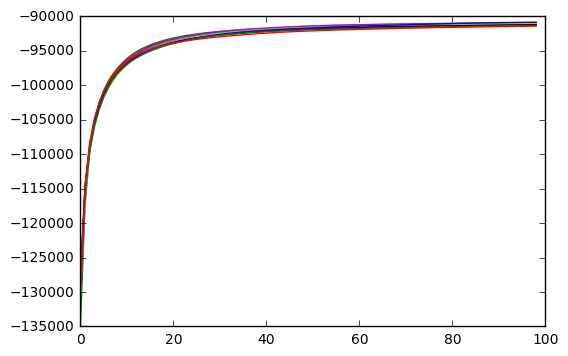

In [1868]:
plt.plot(LL1[1:]); plt.plot(LL2[1:]); plt.plot(LL3[1:]); plt.plot(LL4[1:]); plt.plot(LL5[1:])
plt.plot(LL6[1:]); plt.plot(LL7[1:]); plt.plot(LL8[1:]); plt.plot(LL9[1:]); plt.plot(LL10[1:])
plt.show()

In [1453]:
data = np.array([[LL1[99],RMSE1],[LL2[99],RMSE2],[LL3[99],RMSE3],[LL4[99],RMSE4],[LL5[99],RMSE5],\
                 [LL6[99],RMSE6],[LL7[99],RMSE7],[LL8[99],RMSE8],[LL9[99],RMSE9],[LL10[99],RMSE10]])

pd.DataFrame(data,index=(1,2,3,4,5,6,7,8,9,10),columns=['Training O.F.','RMSE']).sort_values(by='Training O.F.',ascending=0)


,Training O.F.,RMSE
8,-90832.635451,1.132364
5,-90903.242445,1.127121
4,-90957.899737,1.119406
3,-91037.982454,1.123054
6,-91039.916008,1.121409
2,-91116.846476,1.110431
1,-91148.550237,1.109912
7,-91203.032792,1.140587
9,-91329.450697,1.158263
10,-91400.847976,1.106023


In [1740]:
index = pd.read_table("4721/movies.txt",header=None,names=['mov'])
SW = index[index.mov == 'Star Wars (1977)' ].index[0]
FL = index[index.mov == 'My Fair Lady (1964)' ].index[0]
GF = index[index.mov == 'GoodFellas (1990)' ].index[0]

In [1835]:
D=[]
for i in range(1682):
    D.append(distance.euclidean(vj8.T[SW],vj8.T[i]))
D = list(enumerate(D))

StarWars = index.iloc[[i[0] for i in sorted(D,key=itemgetter(1))[1:11]]]
StarWars.columns=['Star Wars']
StarWars.insert(1,'distance',[i[1] for i in sorted(D,key=itemgetter(1))[1:11]])


In [1836]:
D=[]
for i in range(1682):
    D.append(distance.euclidean(vj8.T[FL],vj8.T[i]))
D = list(enumerate(D))

MyFairLady = index.iloc[[i[0] for i in sorted(D,key=itemgetter(1))[1:11]]]
MyFairLady.columns=['My Fair Lady']
MyFairLady.insert(1,'distance',[i[1] for i in sorted(D,key=itemgetter(1))[1:11]])


In [1837]:
D=[]
for i in range(1682):
    D.append(distance.euclidean(vj8.T[GF],vj8.T[i]))
D = list(enumerate(D))

GoodFellas = index.iloc[[i[0] for i in sorted(D,key=itemgetter(1))[1:11]]]
GoodFellas.columns=['Star Wars']
GoodFellas.insert(1,'distance',[i[1] for i in sorted(D,key=itemgetter(1))[1:11]])


# Question 2 Part (b)

In [1838]:
pd.DataFrame(np.hstack((np.array(StarWars), np.hstack((np.array(MyFairLady),np.array(GoodFellas))))), \
                    columns=['Star Wars','Distance','My Fair Lady','Distance', ' Good Fellas','Distance'])

,Star Wars,Distance,My Fair Lady,Distance,Good Fellas,Distance
0,"Empire Strikes Back, The (1980)",0.310171,"Sound of Music, The (1965)",0.713135,Bonnie and Clyde (1967),0.658027
1,Return of the Jedi (1983),0.612615,Mary Poppins (1964),0.737431,Casino (1995),0.731793
2,Raiders of the Lost Ark (1981),0.672992,Gone with the Wind (1939),0.805467,"Godfather: Part II, The (1974)",0.747085
3,"Usual Suspects, The (1995)",0.843307,Sabrina (1954),0.853513,Living in Oblivion (1995),0.763826
4,Indiana Jones and the Last Crusade (1989),0.875104,Snow White and the Seven Dwarfs (1937),0.867564,"Good, The Bad and The Ugly, The (1966)",0.808088
5,Toy Story (1995),0.941089,My Family (1995),0.868876,Apocalypse Now (1979),0.826324
6,Meet John Doe (1941),0.958047,"American in Paris, An (1951)",0.944692,"Shining, The (1980)",0.832145
7,"Terminator, The (1984)",0.96704,Cinderella (1950),1.0079,Once Upon a Time in the West (1969),0.854071
8,"Princess Bride, The (1987)",0.989651,"Room with a View, A (1986)",1.02333,Cool Hand Luke (1967),0.868045
9,"Sting, The (1973)",1.00425,Meet Me in St. Louis (1944),1.02729,Full Metal Jacket (1987),0.893671
